# Building intuition about correlations (and a bit of Python linear algebra)

Here we will first try out some basics about linear algebra using Python. **NOTE:** Do not use the numpy.matrix class, which is deprecated. We use the `@` operator for matrix multiplication (or matrix-vector) rather than the numpy `dot` function.

Then we'll do some visualization to develop our intuition about what correlation implies for a multi-variate normal distribution (in this case bivariate):

$$
  \boldsymbol{x} | \boldsymbol{\mu},\boldsymbol{\Sigma} \sim \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})
  \quad\Longrightarrow\quad p(\boldsymbol{x}) = \frac{1}{(2\pi)^N |\boldsymbol{\Sigma}|}
  e^{-(\boldsymbol{x} - \boldsymbol{\mu})^\intercal \boldsymbol{\Sigma}^{-1}(\boldsymbol{x} - \boldsymbol{\mu})}
$$

We parameterize the covariance matrix for $N=2$ parameters as

$$
  \boldsymbol{\Sigma} = \pmatrix{\sigma_1^2 & \rho\sigma_1\sigma_2 \\
                                 \rho\sigma_1\sigma_2 & \sigma_2^2}
$$

In [1]:
%matplotlib inline  

import numpy as np
from numpy.linalg import inv   # inverse of a matrix

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 


## Demo of linear algebra

We use `np.array` to create matrices and vectors, using []'s as delimiters with commas between the entries,
and nesting them to make matrices. Try creating your own vectors and matrices to test your understanding.

The `reshape` method gives a new shape to a numpy array without changing its data. Let's check out its use.

In [2]:
# First a vector with 6 elements. Note the shape.
A_vec = np.arange(6)
print(A_vec, '   shape = ', A_vec.shape)

[0 1 2 3 4 5]    shape =  (6,)


In [3]:
# reshape A_vec into a 2x3 matrix
A_mat1 = A_vec.reshape(2,3,1)
print(A_mat1, '   shape = ', A_mat1.shape)

[[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]]    shape =  (2, 3, 1)


In [4]:
# Your turn: reshape A_vec into a 3x2 matrix and print the result
A_mat2 = A_vec.reshape(6,1)  # fill in an appropriate argument
print(A_mat2, '   shape = ', A_mat2.shape)
A_mat3 = A_vec.reshape(3,2)
print(A_mat3, '   shape = ', A_mat2.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]    shape =  (6, 1)
[[0 1]
 [2 3]
 [4 5]]    shape =  (6, 1)


In [5]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
Sigma = np.array([[1,  0],
                  [0, -1]])

# Here we note the distinction between a numpy 1d list as a vector and
#  a vector as a matrix with one column.
x_vec = np.array([2, 3])
print('shape before: ', x_vec.shape)

print('vector-matrix-vector multiplication: ', x_vec @ Sigma @ x_vec)

x_vec = x_vec.reshape(-1,1)  # convert to matrix column vector
print('\nshape after: ', x_vec.shape)

print('Printed versions of column and row vectors:')
print(x_vec)   # column vector as matrix
print('\n')
print(x_vec.T) # row vector as matrix  (.T takes the transpose)

#print('vector-matrix-vector multiplication: ', x_vec @ Sigma @ x_vec)
print('vector-matrix-vector multiplication: ', x_vec.T @ Sigma @ x_vec)


shape before:  (2,)
vector-matrix-vector multiplication:  -5

shape after:  (2, 1)
Printed versions of column and row vectors:
[[2]
 [3]]


[[2 3]]
vector-matrix-vector multiplication:  [[-5]]


Alternative: define as a $N\times 1$ matrix (row vector) or $1 \times N$ matrix (column vector) directly.

In [8]:
x_vec = np.array([[2, 3]])  # a row vector
print('shape of row vector (rows, cols): ', x_vec.shape)
x_vec = np.array([[2],      
                  [3]])     # a column vector
print('shape of column vector (rows, cols): ', x_vec.shape)

shape of row vector (rows, cols):  (1, 2)
shape of column vector (rows, cols):  (2, 1)


**Predict the result!**

For each of the next four cells, predict what the answer will be before evaluating the cell. If you get an error, discuss with a neighbor what the problem is.

In [9]:
print(x_vec.T @ x_vec)

[[13]]


In [10]:
print(x_vec.T @ Sigma @ x_vec)

[[-5]]


In [12]:
print(x_vec.T @ x_vec)

[[13]]


In [13]:
print(x_vec @ x_vec.T)


[[4 6]
 [6 9]]


## Predict the contour!

First check out the function definitions (compare `covar` to the matrix at the top of this notebook).
Then for each set of `sigma_1`, `sigma_2`, and `rho`, predict what the contour plot will look like before executing the cell.

In [14]:
def covar(sigma_1, sigma_2, rho):
    """
    Return a symmetric 2x2 covariance matrix.
    """
    mat = np.array( [[sigma_1**2,          rho*sigma_1*sigma_2] , 
                     [rho*sigma_1*sigma_2, sigma_2**2         ]])   
    return mat

def log_posterior(x_vec, Sigma):
    """
    Logarithm of bivariate gaussian.
    """
    return -x_vec.T @ inv(Sigma) @ x_vec

In [15]:
def plot_contour(sigma_1, sigma_2, rho):
    """
    Make a plot
    """
    Sigma = covar(sigma_1, sigma_2, rho)
    
    x1_max = 3.; x2_max = 3.
    x1_pts = np.arange(-x1_max, x1_max, .02)  # You may want to adjust the 
    x2_pts = np.arange(-x2_max, x2_max, .02)  #  density of points used.
    x1_grid, x2_grid = np.meshgrid(x1_pts, x2_pts)  
    
    Z_grid = np.array([[log_posterior(np.array([x1, x2]), Sigma) 
                        for x1 in x1_pts] for x2 in x2_pts])
    Z_grid = np.exp(Z_grid - np.max(Z_grid))  # normalize the peak to be 1

    
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    contour_levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    axes[0].contour(x1_grid, x2_grid, Z_grid, levels=contour_levels)
    axes[0].set_xlim(-x1_max, x1_max)
    axes[0].set_ylim(-x2_max, x2_max)
    axes[0].set_xlabel(r'$x_1$')
    axes[0].set_ylabel(r'$x_2$')
    axes[0].set_title('Contour plot with levels 0.2, 0.4, 0.6, 0.8, 1.0')
        
    axes[1].contourf(x1_grid, x2_grid, Z_grid, levels=5, cmap='jet')
    axes[1].set_xlim(-x1_max, x1_max)
    axes[1].set_ylim(-x2_max, x2_max)
    axes[1].set_xlabel(r'$x_1$')
    axes[1].set_ylabel(r'$x_2$')
    axes[1].set_title('Color contour plot with contourf')


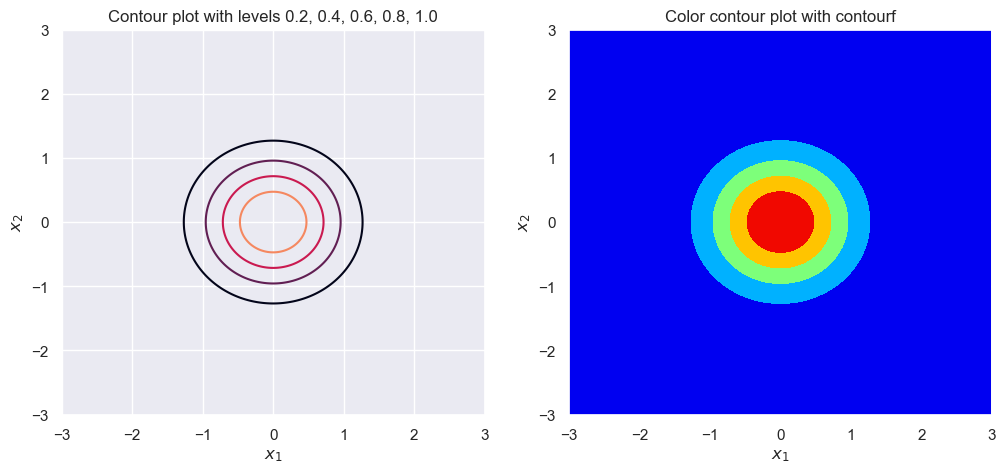

In [16]:
sigma_1 = 1
sigma_2 = 1
rho = 0

plot_contour(sigma_1, sigma_2, rho)

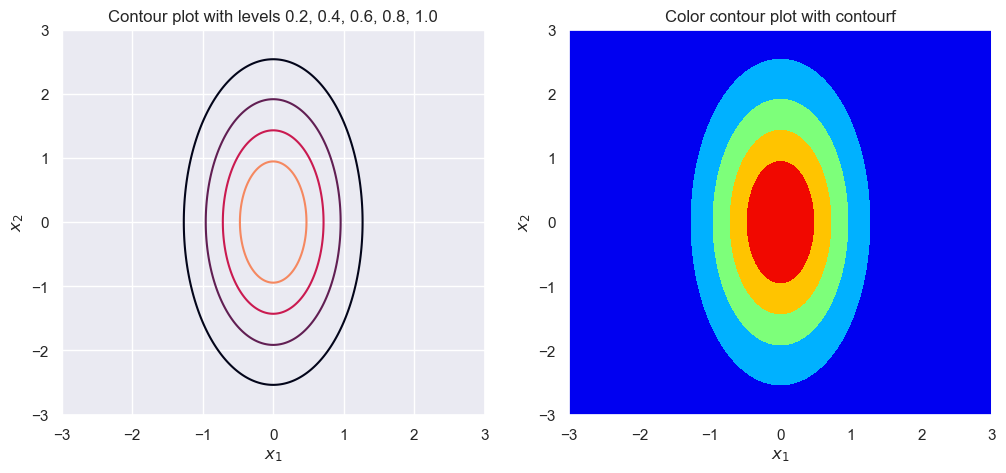

In [17]:
sigma_1 = 1
sigma_2 = 2
rho = 0

plot_contour(sigma_1, sigma_2, rho)

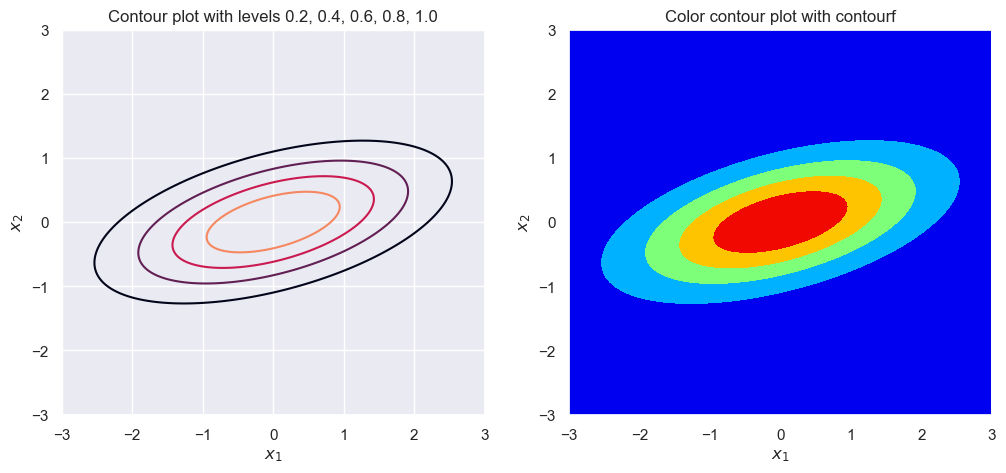

In [18]:
sigma_1 = 2
sigma_2 = 1
rho = .5

plot_contour(sigma_1, sigma_2, rho)

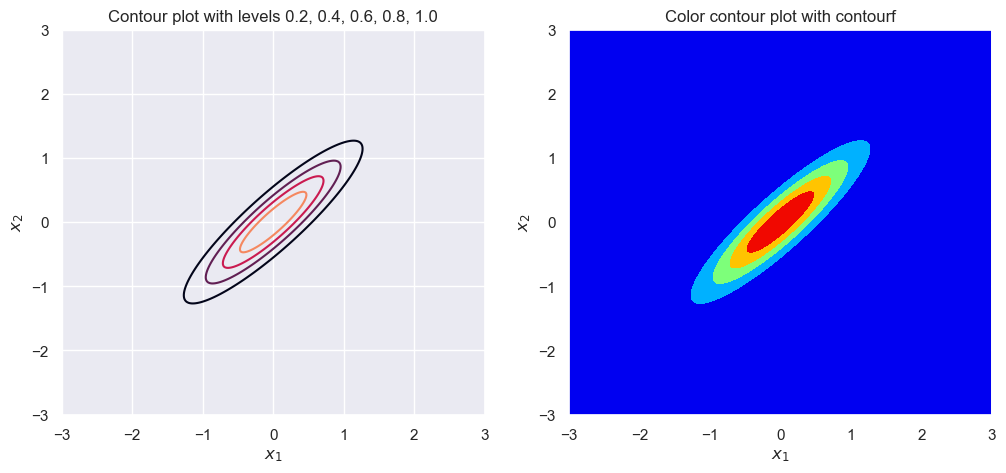

In [19]:
sigma_1 = 1
sigma_2 = 1
rho = .9

plot_contour(sigma_1, sigma_2, rho)

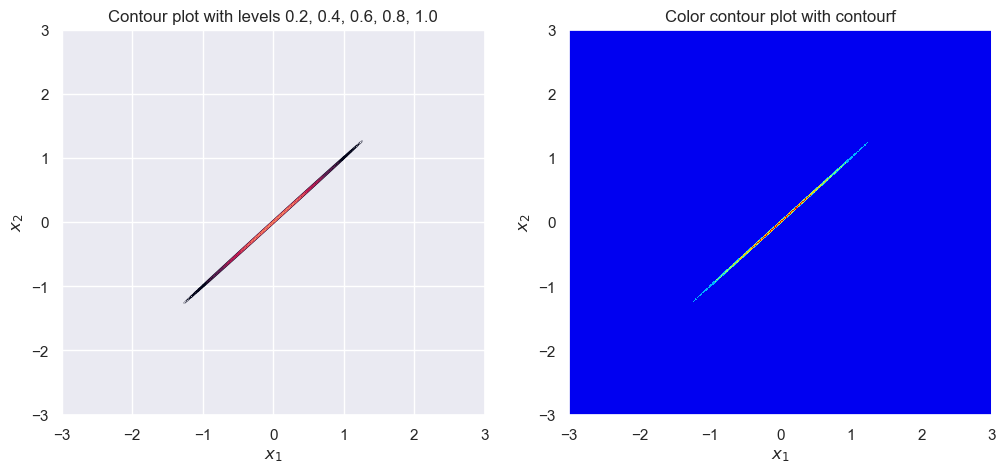

In [21]:
sigma_1 = 1
sigma_2 = 1
rho = .99999

plot_contour(sigma_1, sigma_2, rho)

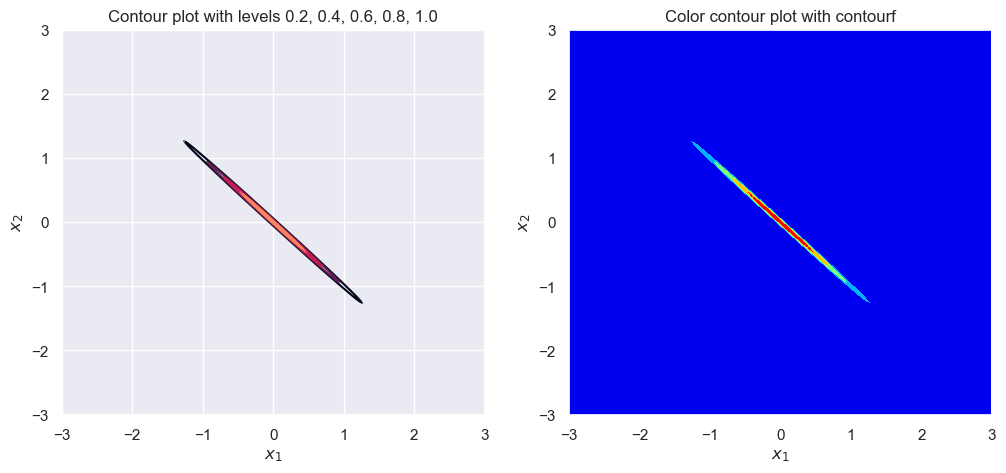

In [22]:
sigma_1 = 1
sigma_2 = 1
rho = -.999

plot_contour(sigma_1, sigma_2, rho)